# Atividade Complementar  – Aprendizado de Máquina – 2022.1
## Professora Ana Luiza Bessa de Paula Barros
## Ciência da computação - UECE


Usaremos o dataset *car data.csv* do site Kaggle.

[Vehicle dataset](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho)

In [1]:
# importando as bibliotecas já apresentadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# lendo o dataset
dados = pd.read_csv(r'/content/car data.csv')
dados.head(100)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
95,corolla altis,2012,5.85,18.61,72000,Petrol,Dealer,Manual,0
96,innova,2016,20.75,25.39,29000,Diesel,Dealer,Automatic,0
97,corolla altis,2017,17.00,18.64,8700,Petrol,Dealer,Manual,0
98,corolla altis,2013,7.05,18.61,45000,Petrol,Dealer,Manual,0


In [3]:
# a dimensão do dataset
dados.shape

(301, 9)

In [4]:
# Verificando se há dados faltantes
dados.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
dados.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
# quantidade de veiculos com tramissão manual e automatico
transmission = dados['Transmission'].value_counts(sort=True)
print("Tipo de tramissão Quantidades:")
print(transmission)

Tipo de tramissão Quantidades:
Manual       261
Automatic     40
Name: Transmission, dtype: int64


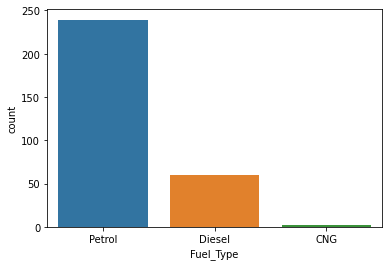

In [7]:
# gráfico em colunas com os tipo de combustivel
sns.countplot(x = dados['Fuel_Type']);

In [8]:
# quantidade de veiculos com tramissão manual e automatico
tipo_combust = dados['Fuel_Type'].value_counts(sort=True)
print("Tipo de combustivel Quantidades:")
print(tipo_combust)

Tipo de combustivel Quantidades:
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


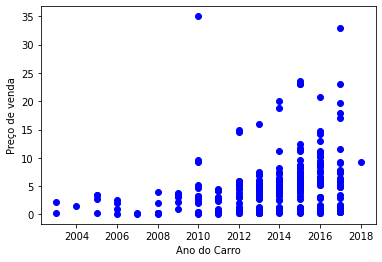

In [9]:
# gráfico de dispersão
plt.scatter(dados['Year'], dados['Selling_Price'],  color='blue')
plt.xlabel("Ano do Carro")
plt.ylabel("Preço de venda")
plt.show()

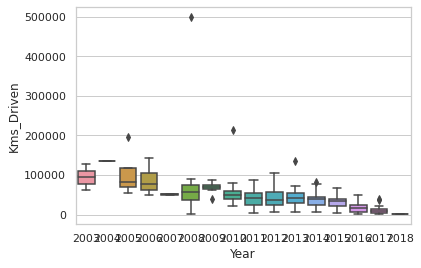

In [10]:
# Gráfico Boxplot
sns.set(style="whitegrid")
sns.boxplot(x='Year', y='Kms_Driven', data=dados);

# Construção de um modelo de regressão linear para previsão de preços

Problemas de regressão buscam prever um valor contínuo com base em um conjunto de dados rotulados, ou seja, deseja-se prever um valor numérico, como, por exemplo, o consumo de um carro tendo dados de distância percorrida e velocidade.

Então, um modelo de regressão corresponde a uma equação matemática que descreve
como duas ou mais variáveis estão relacionadas. 

As variáveis independentes são aquelas que não dependem de outras variáveis para
serem explicadas, como o ano do automóvel, por exemplo. Já as variáveis dependentes são aquelas nas quais se **deseja prever**, e precisam de outras variáveis para serem explicadas, como o valor do seguro de um automóvel, que depende do ano do carro; e também da idade do motorista.



In [11]:
dados1 = dados.copy()
# Para o algoritmo de regressão, vamos substituir os dados que possuem textos por números. 
dados1['Transmission'].replace({'Manual': 0, 'Automatic': 1}, inplace=True)
dados1['Seller_Type'].replace({'Dealer': 0, 'Individual': 1}, inplace=True)
dados1['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2}, inplace=True)
dados1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


##Separando a variável dependente e as variáveis independentes

Os modelos de regressão basicamente são divididos em dois tipos, regressão simples e regressão múltipla.

Os modelos de regressão simples são aqueles em que uma única variável independente é usada para obter a variável dependente. os mosdelos de regressão múltipla, mais de uma variável independente, é usada para obter a variável dependente.



In [19]:
# escolhendo as variáveis independentes
x = dados1[['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

# variável dependente
y = dados1[['Selling_Price']]

###Separar dados em treino e teste

Para construir nosso modelo de aprendizado de maquina precisamos dividir os dados em duas partes. Uma para treinar o modelo e outra para testar o modelo com dados que ele não conhece. Para isso iremos separar 80% dos dados para treino e 20% dos dados para teste. 

Usaremos a classe train_test_split da biblioteca [sklearn](https://scikit-learn.org/stable/), que faz essa separação automaticamente.

In [26]:
from sklearn.model_selection import train_test_split
# A classe train_test_split recebe as variáveis “x” e “y” como entrada, e retorna
# quatro variáveis, x_train, x_test, y_train, e y_test.
# test_size é o argumento onde se informa a % dos dados para testes
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#x_train é a parte usada para treinar o algoritmo
#x_test é a parte usada para testar o algoritmo depois de treinado
#y_train é a parte das respostas usadas no treino
#y_test é a parte das respostas usadas para testar o algoritmo


In [14]:
# Vendo o número de registros que serão usados para o treino e teste
print('Treino')
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)

print('\nTeste')
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

Treino
x_train:  (240, 7)
y_train:  (240, 1)

Teste
x_test:  (61, 7)
y_test:  (61, 1)


## Treinando o Modelo
O modelo de regressão a ser utilizado será o módulo da biblioteca sklearn LinearRegression, e será do tipo linear. A variável “modelo” é criada ao instanciar o modelo de regressão. 

In [27]:
from sklearn.linear_model import LinearRegression

# define um modelo de regressão
# A variável “model” é criada ao instanciaro modelo de regressão.
model = LinearRegression()

# treina o modelo com os dados de treino
# Para realizar o treinamento, será usado o método “fit” desse módulo, usando as
# variáveis x_train e y_train como entrada.
model.fit(x_train, y_train)

LinearRegression()

###Realizar a previsão dos preços

Após o treinamento do modelo, podemos realizar as previsões de preços,
definido na variável “y_pred”. Será usado o método predict da variável model, e, passando como entrada do método predict, a variável x_test. 

In [28]:
# y_pred contém a previsão dos preços do nosso modelo
y_pred = model.predict(x_test)

Agora vamos gerar o gréfico do preço dos carros, previsto pelo modelo versus os dados de teste

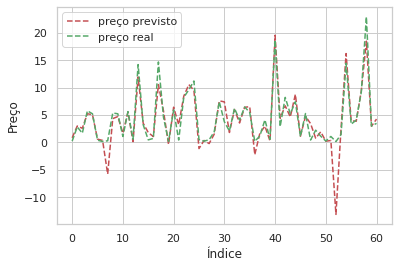

In [29]:
plt.plot(range(y_pred.shape[0]), y_pred,'r--')
plt.plot(range(y_test.shape[0]), y_test,'g--')
plt.legend(['preço previsto', 'preço real'])
plt.ylabel('Preço')
plt.xlabel('Índice')

plt.show()

Para saber o quanto o nosso modelo está explicando os dados, ou o quanto o modelo pode prever corretamente, iremos utilizar a medida r2, que é o coeficiente de determinação. Para isso iremos utilizar os dados da resposta na etapa de teste e os dados de resposta previstos.

In [30]:
from sklearn.metrics import r2_score
# Quanto mais próximo de 1, mais o modelo é capaz de prever corretamente.
print('R2-score: ', r2_score(y_test, y_pred))

R2-score:  0.7651233885589079


#Atividade

**01 - Refaça a construção desse modelo utilizando como variáveis:**

new_x = df[['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type']

new_y = df[['Selling_Price']]

df deve ser uma cópia do dataset original, onde vc deve rotular o "Fuel_Type como sendo:

'Petrol': 1 

'Diesel': 2

'CNG': 0

- Realize a previsão, gere o gráfico e calcule o R2. 

**02 - Refaça a construção do modelos utilizado aqui mudando apenas a separação dos dados de treino e teste para 70% e 30%. Comente o resultado do calculo do R2.**
